## Imports

In [8]:
import pandas as pd
import scipy.io as sp
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

# Extracting Patient Records from Header Data CPSC2018

### Import all CT Codes for Dx column

In [ ]:
ct_codes = pd.read_csv("../Data/Dx_map.csv")
replace_df = ct_codes.iloc[:, 1:]
cols = ['Age','Sex','Dx','Rx','Hx','Sx']
# abbrev = list(replace_df["Abbreviation"])
# cols.extend(abbrev)
print(cols)

In [ ]:
patientrecords = pd.DataFrame(columns=cols)

In [ ]:
patientrecords

### Function that extracts all patient information into a dataframe

In [ ]:
def file_parse(file_locs, df, keys):
    file_no = -1
    for path in file_locs:
        with open(path, 'r') as file_object:
            file_no += 1
            temp_arr = []
            for line in file_object:
                    for key in keys:
                        if key in line:
                            temp_arr.append(line.split(key,1)[1][:-1])

            df.loc[file_no] = [temp_arr[0]] + [temp_arr[1]] + [temp_arr[2]] + [temp_arr[3]] + [temp_arr[4]] + [temp_arr[5]]
    
    return df

### Retrieve list of all Header Files

In [ ]:
all_files = glob.glob("../Data/CPSC2018/Training_WFDB/*.hea")

### Call file parser function

In [ ]:
df1 = file_parse(all_files, patientrecords, ['Age: ','Sex: ','Dx: ','Rx: ','Hx: ','Sx: '])
print(df1)

In [ ]:
df1[df1['Dx'].str.contains(',') == True]

### Import all CT Codes for Dx column

In [ ]:
abbrev = list(replace_df["Abbreviation"])
df2 = pd.DataFrame(columns=abbrev)
df3 = pd.concat([df1,df2])
df3

In [ ]:
ct_codes = pd.read_csv("../Data/Dx_map.csv")

In [ ]:
replace_df = ct_codes.iloc[:, 1:]

In [ ]:
print(list(replace_df["Abbreviation"]))

### Replace numerical categories with CT codes (for easier viewing)

In [ ]:
# Replace numerical with abbreviation CT Codes
for i in range(df1.shape[0]):
    for j in range(0, len(list(replace_df.iloc[:,0]))):
        if str(replace_df.iloc[j,0]) in str(df1['Dx'].iloc[i]):
            df1['Dx'].iloc[i] = df1['Dx'].iloc[i].replace(str(replace_df.iloc[j,0]), str(replace_df.iloc[j,1]))
    

In [ ]:
testdf = df1[df1["Dx"].str.contains(",")].reset_index(drop=True)
list(testdf["Dx"][0].split(","))

In [ ]:

# Parse header file
def file_parse(file_locs, df, keys):
    file_no = -1
    for path in file_locs:
        with open(path, 'r') as file_object:
            file_no += 1
            temp_arr = []
            for line in file_object:
                    for key in keys:
                        if key in line:
                            temp_arr.append(line.split(key,1)[1][:-1])

            df.loc[file_no] = [temp_arr[0]] + [temp_arr[1]] + [temp_arr[2]]
    
    return df

# Extract all header data and diagnosis classes
def extract_hea_data(inputdir, outputdir, fs):
    # Initialise dataframe with necessary column names
    patientrecords = pd.DataFrame(columns=['Age','Sex','Dx'])
    # Get list of all files in the input directory
    all_files = glob.glob(inputdir)
    # Parse the header file and storing it in dataframe
    df1 = file_parse(all_files, patientrecords, ['Age: ','Sex: ','Dx: '])
    # Insert sampling frequency column
    fscol = [fs] * df1.shape[0]
    df1["FS"] = fscol
    # Read csv file containing all the diagnosis codes (CT Codes)
    ct_codes = pd.read_csv("../Data/Dx_map.csv")
    replace_df = ct_codes.iloc[:, 1:]
    # Replace numerical with abbreviation CT Codes
    for i in range(df1.shape[0]):
        for j in range(0, len(list(replace_df.iloc[:,0]))):
            if str(replace_df.iloc[j,0]) in str(df1['Dx'].iloc[i]):
                df1['Dx'].iloc[i] = df1['Dx'].iloc[i].replace(str(replace_df.iloc[j,0]), str(replace_df.iloc[j,1]))
    print(df1.shape)
    # Store dataframe as csv in output directory
    df1.to_csv(outputdir)
    

                
# CPS2018             
extract_hea_data(inputdir="../Data/CPSC2018/Training_WFDB/*.hea", 
                 outputdir="../Data/CPSC2018/cpsc2018_patient_information.csv", fs=500)     

# CPS2018 UNUSED
extract_hea_data(inputdir="../Data/CPSC2018_UNUSED/Training_2/*.hea", 
                 outputdir="../Data/CPSC2018_UNUSED/cpsc2018unused_patient_information.csv", fs=500)     

# Georgia
extract_hea_data(inputdir="../Data/GEORGIA/WFDB/*.hea", 
                 outputdir="../Data/GEORGIA/georgia_patient_information.csv", fs=500)

# PTB
extract_hea_data(inputdir="../Data/PTB/WFDB/*.hea", 
                 outputdir="../Data/PTB/ptb_patient_information.csv", fs=1000)

# PTBXL
extract_hea_data(inputdir="../Data/PTBXL/WFDB/*.hea", 
                 outputdir="../Data/PTBXL/ptbxl_patient_information.csv", fs=500)

# St. Petersburg
extract_hea_data(inputdir="../Data/STPETERSBURG/WFDB/*.hea", 
                 outputdir="../Data/STPETERSBURG/stpetersburg_patient_information.csv", fs=257)

## Read CSV File containing patient information (Age, Sex, Condition)

In [2]:
patient_info_cps2018 = pd.read_csv("../Data/CPSC2018/cpsc2018_patient_information.csv")
print(patient_info_cps2018.shape)

patient_info_cps2018_unused = pd.read_csv("../Data/CPSC2018_UNUSED/cpsc2018unused_patient_information.csv")
print(patient_info_cps2018_unused.shape)

patient_info_georgia = pd.read_csv("../Data/GEORGIA/georgia_patient_information.csv")
print(patient_info_georgia.shape)

patient_info_ptb = pd.read_csv("../Data/PTB/ptb_patient_information.csv")
print(patient_info_ptb.shape)

patient_info_ptbxl = pd.read_csv("../Data/PTBXL/ptbxl_patient_information.csv")
print(patient_info_ptbxl.shape)

patient_info_stptb = pd.read_csv("../Data/STPETERSBURG/stpetersburg_patient_information.csv")
print(patient_info_stptb.shape)


allframes = [patient_info_cps2018, 
           patient_info_cps2018_unused, 
           patient_info_georgia, patient_info_ptb, 
           patient_info_ptbxl, 
           patient_info_stptb]

fulldataset = pd.concat(allframes)
fulldataset = fulldataset.iloc[:,1:5]

leads = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
for i in range(len(leads)):
    fulldataset[leads[i]] = ""


fulldataset = fulldataset.reset_index(drop=True)
print(fulldataset.shape)
#43263 samples

(6877, 5)
(3453, 5)
(10344, 5)
(516, 5)
(21837, 5)
(74, 5)
(43101, 16)


In [ ]:
fulldataset

## Create Columns in Dataframe to Store Lead Data

## Get all lead data from each .mat file in directory

In [10]:
from scipy import signal as sig


def extract_leads():
    # Directories containing ECG recordings
    dirs = ["../Data/CPSC2018/Training_WFDB/", 
    "../Data/CPSC2018_UNUSED/Training_2/", 
    "../Data/GEORGIA/WFDB/", 
    "../Data/PTB/WFDB/",
    "../Data/PTBXL/WFDB/",
    "../Data/STPETERSBURG/WFDB/"]
    # Sampling frequency for each dataset source
    fsarray = [500, 500, 500, 1000, 500, 257]

    i=0
    fsval = -1
    tarfs = 500 # Target sampling frequency value (500Hz)

    for directory in dirs:
        print(directory)
        fsval+=1
        for filename in os.listdir(directory):
            if filename.endswith(".mat"):
                # Load ECG recording in temporary variable
                temp = sp.loadmat(str(directory)+str(filename))
                I = pd.DataFrame(temp['val'])
                # Resample frequency based on dataset source (using "fsarray" variable)
                for j in range(I.shape[0]):
                    # Resample to 500Hz
                    if fsval == 3 or fsval == 5:
                        tempI = sig.resample(I.iloc[j,:].to_numpy(), 500)
                    else:
                        tempI = I.iloc[j,:].to_numpy()

                    # Truncate or Zero Pad Signals based on number of samples
                    if len(tempI) > 5000:
                        tempI = tempI[0:5000]
                    elif len(tempI) < 5000:
                        zeropadtemp = [0] * (5000 - len(tempI))
                        tempI = np.concatenate([tempI, zeropadtemp])
                    fulldataset.at[i, str(leads[j])] = tempI
                i+=1
            else:
                continue
        
extract_leads()

../Data/CPSC2018/Training_WFDB/
../Data/CPSC2018_UNUSED/Training_2/
../Data/GEORGIA/WFDB/
../Data/PTB/WFDB/
../Data/PTBXL/WFDB/
../Data/STPETERSBURG/WFDB/


### Binarise Dx Column

In [11]:
labeldf = fulldataset["Dx"].str.get_dummies(',')
labeldf

,AB,AF,AFAFL,AFL,AH,AJR,ALR,AMI,AMIs,AP,...,VH,VPB,VPEx,VPP,VPVC,VTach,VTrig,WAP,WPW,abQRS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
43097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
43099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Combine Binarised Label Dataframe to Original Dataframe

In [12]:
finaldf = pd.concat([fulldataset, labeldf], axis=1)
finaldf

,Age,Sex,Dx,FS,I,II,III,aVR,aVL,aVF,...,VH,VPB,VPEx,VPP,VPVC,VTach,VTrig,WAP,WPW,abQRS
0,74.0,Male,RBBB,500,"[28, 39, 45, 49, 54, 56, 58, 60, 60, 61, 65, 6...","[7, 11, 15, 17, 20, 24, 29, 35, 41, 48, 57, 65...","[-21, -28, -30, -32, -34, -32, -29, -25, -19, ...","[-17, -24, -29, -32, -36, -39, -42, -47, -50, ...","[24, 33, 38, 41, 44, 44, 44, 42, 39, 36, 36, 3...","[-7, -9, -7, -7, -7, -4, 0, 4, 10, 16, 24, 30,...",...,0,0,0,0,0,0,0,0,0,0
1,49.0,Female,SNR,500,"[-1, -4, 2, 11, 8, 9, 8, 7, -1, -6, -12, -9, -...","[-15, -23, -18, -19, -8, 4, 2, -3, -1, 4, 2, -...","[-15, -18, -20, -29, -16, -5, -7, -10, 0, 11, ...","[7, 14, 8, 4, 0, -7, -5, -2, 1, 1, 5, 4, -1, 2...","[8, 8, 10, 20, 12, 7, 8, 8, -1, -8, -12, -8, -...","[-16, -20, -18, -24, -13, -1, -3, -6, -1, 8, 7...",...,0,0,0,0,0,0,0,0,0,0
2,81.0,Female,AF,500,"[43, 16, -33, -27, -10, -17, -12, -12, 18, 19,...","[8, 1, -4, -5, -9, 8, 3, -6, 8, -8, -37, -8, -...","[-35, -15, 29, 22, 1, 25, 15, 6, -10, -27, -47...","[-25, -7, 18, 16, 9, 4, 5, 8, -12, -5, 14, -22...","[38, 15, -31, -24, -7, -20, -13, -9, 14, 23, 2...","[-14, -8, 12, 8, -4, 16, 9, 0, -1, -17, -41, -...",...,0,0,0,0,0,0,0,0,0,0
3,45.0,Male,AF,500,"[-45, -10, 19, 35, 60, 71, 99, 65, 14, 27, 34,...","[48, 66, 63, 68, 63, 96, 169, 154, 98, 116, 14...","[93, 76, 44, 33, 4, 25, 70, 89, 84, 89, 116, 6...","[-2, -27, -41, -52, -61, -84, -134, -110, -56,...","[-69, -43, -13, 0, 28, 23, 15, -12, -35, -30, ...","[70, 71, 54, 51, 34, 61, 120, 122, 91, 103, 13...",...,0,0,0,0,0,0,0,0,0,0
4,53.0,Male,VEB,500,"[27, 28, 25, 19, 16, 14, 14, 16, 20, 22, 22, 2...","[103, 104, 101, 95, 89, 85, 86, 92, 98, 107, 1...","[76, 76, 76, 76, 73, 71, 72, 76, 78, 85, 91, 9...","[-64, -65, -62, -56, -52, -49, -49, -53, -58, ...","[-23, -23, -25, -28, -28, -28, -28, -29, -28, ...","[90, 90, 88, 85, 81, 78, 79, 84, 88, 96, 102, ...",...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43096,64.0,M,"PAF,BBB,WPW",257,"[-196.1032597825013, -833.4494669144715, -705....","[-545.2577936133412, -670.6674269186035, -653....","[-538.661501706024, -26.766651591596748, -137....","[272.7513093605613, 654.3246744715141, 581.698...","[67.61888113873515, -507.139730490306, -387.97...","[-587.300155601403, -393.99877450967404, -440....",...,0,0,0,0,0,0,0,0,1,0
43097,73.0,M,"LVH,CHD,STach,VEB",257,"[-1745.6060553951434, -2464.2763828009565, -23...","[381.58498033036994, 1234.3698020925076, 1058....","[610.7062462700779, 2182.1571326346434, 1865.4...","[-807.3983190794883, -874.4652383522645, -857....","[-2015.3476996795819, -3160.2206336598438, -29...","[-397.7957302309542, 814.3273084878565, 568.15...",...,0,0,0,0,0,0,0,0,0,0
43098,73.0,M,"LVH,CHD,Brady,SVPB,VEB,VPVC",257,"[120.58139993359788, 3755.18284357986, 2577.46...","[2380.8860580101373, 1783.0833491974483, 1678....","[-3.0777019374839836, -4235.523844658088, -316...","[-1455.597371025172, -2974.0130311816906, -233...","[244.09107452847306, 4177.6446122640955, 3052....","[1188.4503944074481, -1226.398690159932, -742....",...,0,0,0,0,1,0,0,0,0,0
43099,66.0,M,"FB,STach,VEB,MI",257,"[-499.0775085346894, -2801.590754004871, -2361...","[-1753.7473816877646, -1925.43670498426, -1805...","[477.3670343974155, 2608.1928154517127, 2288.2...","[974.4947137578587, 2211.1155025749945, 1931.0...","[-529.4207916222465, -2746.084342918986, -2365...","[-605.4537347529765, 373.59315477461803, 273.8...",...,0,0,0,0,0,0,0,0,0,0


In [18]:
finaldf.to_csv("../Data/fullecgdata.csv")
finaldf.to_pickle("../Data/fullecgdata.pkl")

In [15]:
len(fulldataset["I"][0])

5000

In [ ]:
fulldataset["I"][0]

## Final Dataset CSV Export

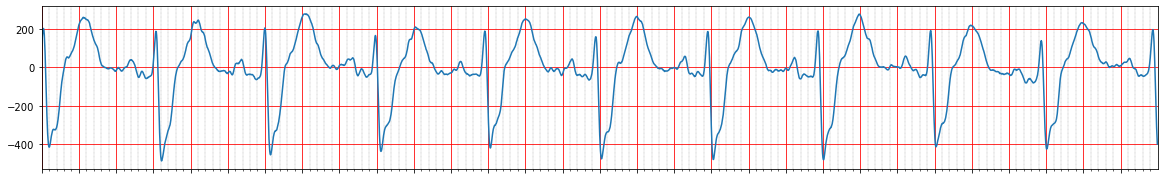

In [17]:
# Plot ECG Lead using lead data (signal)
def plotlead(lead):

    fig, ax = plt.subplots(figsize=(20,3))

    ax.plot(list(np.arange(0.0,(len(lead)*0.002),0.002)), lead)
    # Turn on the minor ticks on
    plt.grid(True)
    major_ticks = np.arange(0.0,(len(lead)*0.002),0.2)
    minor_ticks = np.arange(0.0,(len(lead)*0.002),0.04)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)

    # Make the major grid
    plt.grid(which='major', linestyle='-', color='red', linewidth='0.8')
    # Make the minor grid
    plt.grid(which='minor', linestyle=':', color='black', linewidth='0.3')

    ax.xaxis.set_ticklabels([])
    plt.xlim(4,(len(lead)*0.002))
    plt.show()
    
plotlead(fulldataset['I'][0])